# Homework 6

Reproduce Figure 5.6 in the textbook.

In [1]:
using LinearAlgebra
using Plots
plotly()
gr()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/yanxon/.julia/packages/Plots/Xnzc7/src/backends.jl:375


Plots.GRBackend()

In [2]:
# Rosenbrock function

f_r(x) = (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f_r(x) = [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

function rosenplot()
    _f(x, y) = (1-x)^2 + 100*(4y - x^2)^2
    xmin, xmax, ymin, ymax = -3, 2, -0.5, 2
    x, y = xmin:0.01:xmax, ymin:0.01:ymax
    contour(x, y, _f,
            size=(500, 250),
            levels=[2,10,50,200,500],
            framestyle=:box,
            xlims=(xmin, xmax),
            ylims=(ymin, ymax),
            )
end

rosenplot (generic function with 1 method)

In [3]:
abstract type DescentMethod end

mutable struct Momentum <: DescentMethod
    x
    α # learning rate
    β # momentum decay
    v # momentum
end

function step!(M::Momentum, f, ∇f)
    α, β, v, g = M.α, M.β, M.v, ∇f(M.x)
    v[:] = β*v - α*g
    M.x += v
end

mutable struct NesterovMomentum <: DescentMethod
    x
    α
    β
    v
end
function step!(M::NesterovMomentum, f, ∇f)
    α, β, v = M.α, M.β, M.v
    v[:] = β*v - α*∇f(M.x + β*v)
    M.x += v
end

step! (generic function with 2 methods)

In [4]:
function optimize(M, f, ∇f; max_iter=40, model="Momentum")
    x = rand(1, length(M.x))
    for (i, m) in enumerate(M.x)
        x[i] = m
    end
    
    for i in 1:max_iter
        x_prev = M.x
        if model == "Momentum"
            step!(M::Momentum, f, ∇f)
        elseif model == "Nesterov"
            step!(M::NesterovMomentum, f, ∇f)
        end
        x = [x; (M.x)']
    end
    return x
end

optimize (generic function with 1 method)

In [5]:
x0 = [-2, 1.5]
N = 40
α, β, v = 3e-4, 0.9, zeros(length(x0))

M = Momentum(x0, α, β, v)
xs = optimize(M, f_r, ∇f_r, max_iter=N)

M1 = Momentum(x0, α, 0., zeros(length(x0)))
xs1 = optimize(M1, f_r, ∇f_r, max_iter=N);

41×2 Array{Float64,2}:
 -2.0      1.5
 -2.4782   1.02
 -1.86306  1.51475
 -2.43994  0.893631
 -1.74139  1.46454
 -2.33022  0.786363
 -1.68942  1.33464
 -2.19148  0.73838
 -1.7033   1.18215
 -2.07519  0.743585
 -1.74163  1.06328
 -1.99493  0.770516
 -1.77824  0.985956
  ⋮        
 -1.84996  0.853196
 -1.84613  0.855494
 -1.84747  0.852184
 -1.84478  0.853246
 -1.84524  0.850905
 -1.84325  0.851212
 -1.84315  0.849462
 -1.84159  0.84931
 -1.84116  0.847919
 -1.83986  0.847489
 -1.83923  0.846316
 -1.83808  0.845717

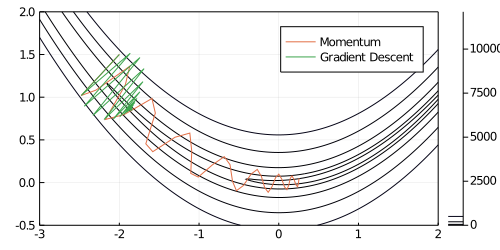

In [6]:
rosenplot()
plot!(xs[:,1], xs[:,2], label="Momentum")
plot!(xs1[:,1], xs1[:,2], label="Gradient Descent")

In [7]:
x0 = [-2, 1.5]
N = 40
α, β, v = 0.0002, 0.92, zeros(length(x0))

M2 = NesterovMomentum(x0, α, β, zeros(length(x0)))
xs2 = optimize(M2, f_r, ∇f_r, max_iter=N, model="Nesterov")

41×2 Array{Float64,2}:
 -2.0       1.5
 -2.3188    1.18
 -1.9251    1.4105
 -2.06796   0.974949
 -1.75113   0.98069
 -1.67041   0.695843
 -1.49135   0.563793
 -1.32668   0.440819
 -1.1677    0.338932
 -1.01551   0.255202
 -0.870985  0.186783
 -0.734412  0.131729
 -0.605868  0.0884838
  ⋮         
  0.581787  0.0842937
  0.612609  0.0935444
  0.640974  0.102474
  0.667085  0.111045
  0.691124  0.119236
  0.713263  0.127031
  0.733654  0.134427
  0.752442  0.141424
  0.769754  0.148026
  0.785711  0.154243
  0.800422  0.160087
  0.813987  0.165571

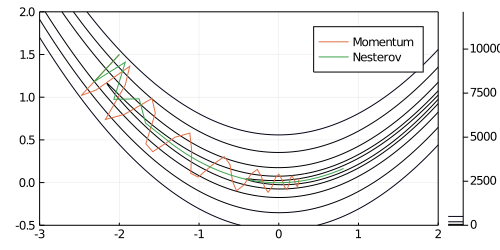

In [8]:
rosenplot()
plot!(xs[:,1], xs[:,2], label="Momentum")
plot!(xs2[:,1], xs2[:,2], label="Nesterov")